# 의사결정트리
knn 예제와 동일한 예측을 의사결정트리 알고리즘으로 풀이 한다.

In [9]:
import pandas as pd
from sklearn import tree
from matplotlib import pyplot as plt

In [10]:
data = pd.read_csv('data/mydata.csv')
data.head(10)

id  walk  view sex  payment country
0   1    17     5   M      176       C
1   2    12     5   M      194       C
2   3    32    12   F      384       C
3   4    25     9   F      329       C
4   5    23     8   F      290       C
5   6    24     8   M      246       C
6   7    22     6   F      235       C
7   8    32    11   F      353       C
8   9    30    10   F      324       C
9  10    13     2   M       93       C

In [11]:
# 더미 코딩
data['country'] = (data['country']=='C')
data.head(5)
# 이곳 까지 KNN과 동일

id  walk  view sex  payment  country
0   1    17     5   M      176     True
1   2    12     5   M      194     True
2   3    32    12   F      384     True
3   4    25     9   F      329     True
4   5    23     8   F      290     True

In [12]:
feature_names = ['walk', 'view'] # walk와 view 두개의 column name을 feature_name에 저장
X = data[feature_names] # data 정제 후 X에 저장
X.head(5) # 임의 출력

walk  view
0    17     5
1    12     5
2    32    12
3    25     9
4    23     8

In [13]:
y = data['country'] # country 관련 data만 y에 저장

In [14]:
# 학습용 데이터와 테스트용 데이터 작성
from sklearn.model_selection import train_test_split
# training data와 test data의 비율을 3:1로 지정
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=33)

In [15]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_leaf=3) # 의사결정트리 생성(트리depth2)
clf = clf.fit(X_train, y_train) # 의사결정트리에 training data 학습
clf

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=3,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [16]:
with open("./mytree.dot", 'w') as  f:
    dot_data=tree.export_graphviz(clf, out_file=f, feature_names=feature_names) # 작성된 의사결정 트리를 파일로 작성

In [17]:
# 작성된 파일을 그림파일로 만들기
# 트리 출력은 마크다운 모드에서 ![Alt text](./mytree.png) 입력 후 실행

# !dot -Tpng mytree.dot -o mytree.png
# 상단의 명령어는 리눅스에서 동작하기 때문에 의사결정 트리의 png파일은 미리 제작하여 첨부

In [18]:
from sklearn import metrics
y_pred = clf.predict(X_test) # 학습된 의사결정트리를 이용해 출신국가 예측
print(metrics.classification_report(y_test, y_pred)) # 예측 결과 출력

             precision    recall  f1-score   support

      False       0.86      0.96      0.91        56
       True       0.97      0.87      0.92        69

avg / total       0.92      0.91      0.91       125



첨부한 의사결정트리
![Alt text](./mytree.png)

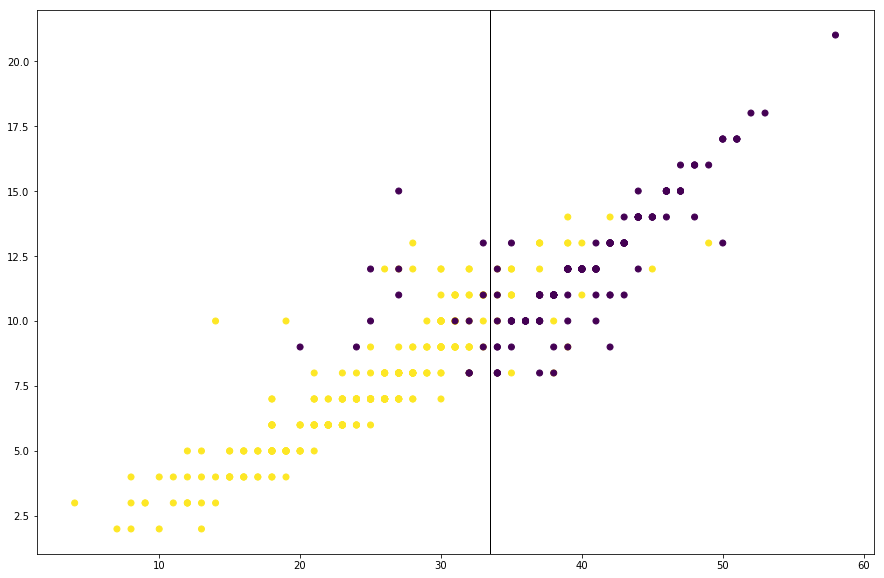

In [19]:
# 의사결정트리 1단계 정보를 이용한 시각화 예시
plt.clf()
plt.figure(figsize=(15, 10))
plt.xlabel='walk'
plt.ylabel='view'
plt.scatter(x=data['walk'], y=data['view'], c=data['country'])
plt.axvline(x = 33.5, color='k', linewidth=1)
plt.show()

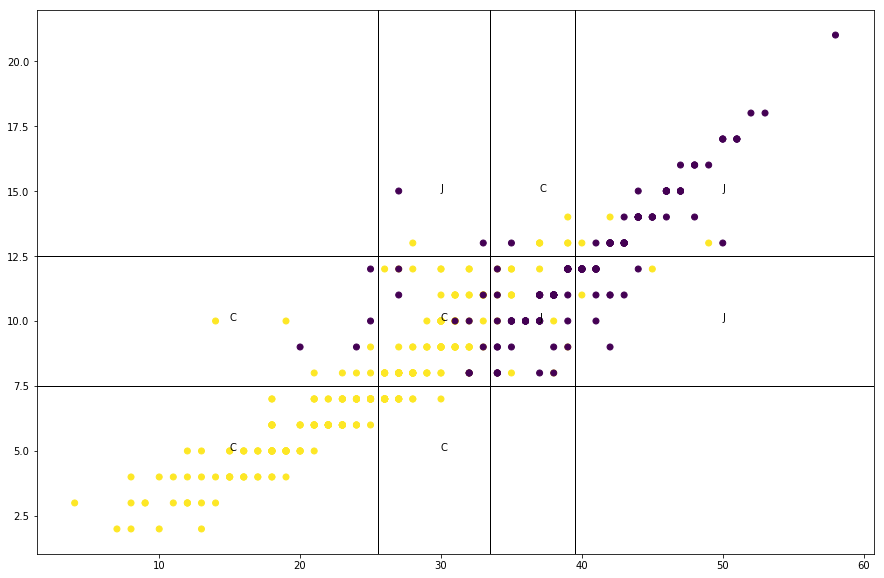

In [20]:
# 의사결정트리를 이용한 시각화 예시
plt.clf()
plt.figure(figsize=(15, 10))
plt.xlabel='walk'
plt.ylabel='view'
plt.scatter(data['walk'], data['view'], c=data['country'])
plt.axvline(x = 33.5, color='k', linewidth=1)
plt.axvline(x = 39.5, color='k', linewidth=1)
plt.axvline(x = 25.5, color='k', linewidth=1)
plt.axhline(y = 7.5, color='k', linewidth=1)
plt.axhline(y = 12.5, color='k', linewidth=1)

plt.text(x=15, y=5, s='C')
plt.text(x=15, y=10, s='C')
plt.text(x=30, y=10, s='C')
plt.text(x=30, y=5, s='C')
plt.text(x=30, y=15, s='J')
plt.text(x=37, y=10, s='J')
plt.text(x=37, y=15, s='C')
plt.text(x=50, y=10, s='J')
plt.text(x=50, y=15, s='J')

plt.show()

### 실습예제
상단의 고객데이터를 이용해 의사결정트리의 깊이를 3으로 정하고, train과 test의 데이터를 9:1로 설정하여 예측하여 report 표를 출력하시오.

In [21]:
X = data[feature_names]
y = data['country']
# 학습용 데이터와 테스트용 데이터 작성
from sklearn.model_selection import train_test_split
# training data와 test data의 비율을 3:1로 지정
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=33)
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_leaf=3) # 의사결정트리 생성(트리depth2)
clf = clf.fit(X_train, y_train) # 의사결정트리에 training data 학습

from sklearn import metrics
y_pred = clf.predict(X_test) # 학습된 의사결정트리를 이용해 출신국가 예측
print(metrics.classification_report(y_test, y_pred)) # 예측 결과 출력

             precision    recall  f1-score   support

      False       0.88      0.96      0.92        24
       True       0.96      0.88      0.92        26

avg / total       0.92      0.92      0.92        50

